In [6]:
import torch
import sys

sys.path.append('C:/Users/nilso/Documents/EPFL/PDM/PDM_PINN/SciANN/DNN_TEST/sys/')

from dataloader import *

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

import numpy as np

plt.rcParams['image.cmap'] = 'viridis'

In [10]:
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [26]:
training_data = dataset('Training_Data/Simple_Homogeneous_Moseley/','Training_Data/Simple_Homogeneous_Moseley_Event0000_Continuous.csv',event='Event0000')
sample = training_data.__getitem__(0)

[]

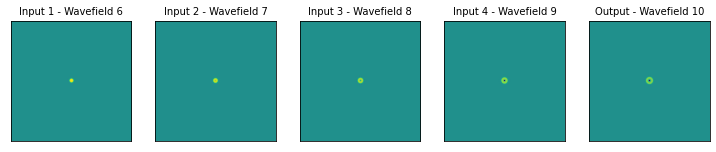

In [22]:
# # # Plot
fig, axs = plt.subplots(1,5,figsize=(10,2),constrained_layout=True)

wavefields_inputs = sample['wave_input'].transpose(1, 0).detach().numpy()
wavefields_outputs = sample['wave_output'].transpose(1, 0).detach().numpy()

axs = axs.ravel()
for _i, ax in enumerate(axs[:-1]):
    if _i == 0 :
        im = ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0))
        clim = im.get_clim()
    else:
        ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    
    wavefield = sample['wave_output_label'] - 4 + _i
    ax.set_title(f'Input {_i+1} - Wavefield {wavefield}',fontsize=10)

axs[-1].imshow(wavefields_outputs[0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
axs[-1].set_title('Output - Wavefield {}'.format(sample['wave_output_label']),fontsize=10)

plt.setp(axs, xticks=[], yticks=[])

In [16]:
# # # Get samples
torch.manual_seed(1)
dataloader = DataLoader(training_data, batch_size=5, shuffle=True)
samples = next(iter(dataloader))

[]

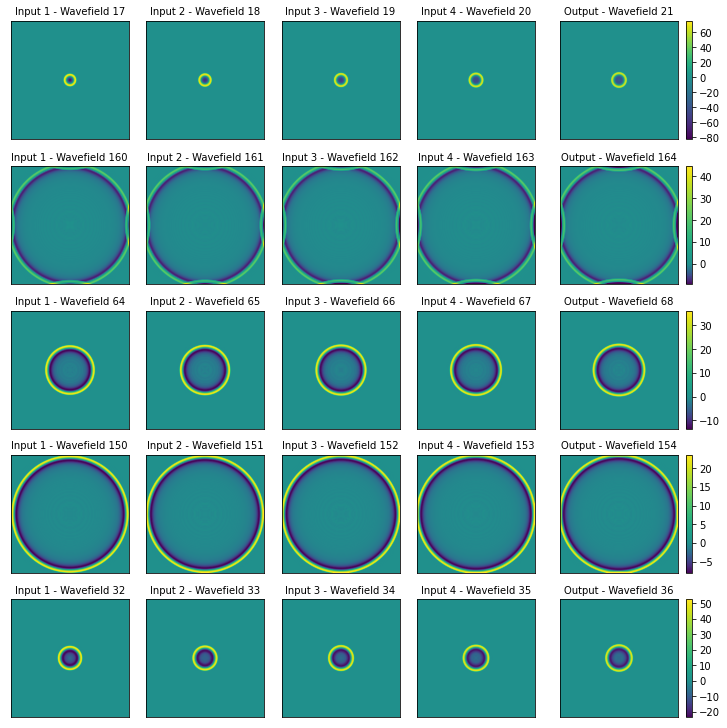

In [25]:
# # # Plot
wavefields_inputs = samples['wave_input'].transpose(2, 1).detach().numpy()
wavefields_outputs = samples['wave_output'].transpose(2, 1).detach().numpy()

fig, axs = plt.subplots(samples['wave_input'].__len__(),5,figsize=(10,samples['wave_input'].__len__()*2),constrained_layout=True)

for row in range(samples['wave_input'].__len__()):
    for column in range(4):
        if column == 0:
            im = axs[row,column].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0))
            clim = im.get_clim()
        else:
            axs[row,column].imshow(wavefields_inputs[row,column,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)

        wavefield = samples['wave_output_label'][row].detach().numpy() - 4 + column
        axs[row,column].set_title(f'Input {column+1} - Wavefield {wavefield}',fontsize=10)
        
    
    axs[row,-1].imshow(wavefields_outputs[row,0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    axs[row,-1].set_title('Output - Wavefield {}'.format(samples['wave_output_label'][row]),fontsize=10)

    #ax_divider = make_axes_locatable(axs[row,-1])
    #cax = ax_divider.append_axes("right", size="7%", pad="2%")
    fig.colorbar(im, ax=axs[row,-1],shrink=1)
plt.setp(axs, xticks=[], yticks=[])

In [35]:
training_data = dataset('Training_Data/Moseley_EARTH/','Training_Data/Moseley_Earth_Event0000_Continuous.csv',event='Event0000',velocity_field='Training_Data/Velocity_Field_1.npy')
sample = training_data.__getitem__(150)

[]

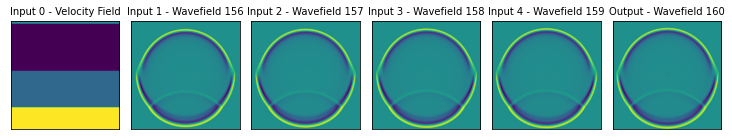

In [38]:
# # # Plot
fig, axs = plt.subplots(1,6,figsize=(10,2),constrained_layout=True)

wavefields_inputs = sample['wave_input'].transpose(1, 0).detach().numpy()
wavefields_outputs = sample['wave_output'].transpose(1, 0).detach().numpy()

axs = axs.ravel()
for _i, ax in enumerate(axs[1:-1]):
    if _i == 0 :
        im = ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0))
        clim = im.get_clim()
    else:
        ax.imshow(wavefields_inputs[_i,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
    
    wavefield = sample['wave_output_label'] - 4 + _i
    ax.set_title(f'Input {_i+1} - Wavefield {wavefield}',fontsize=10)

axs[-1].imshow(wavefields_outputs[0,:,:], norm=MidpointNormalize(midpoint=0),clim=clim)
axs[-1].set_title('Output - Wavefield {}'.format(sample['wave_output_label']),fontsize=10)

axs[0].imshow(wavefields_inputs[-1])
axs[0].set_title('Input 0 - Velocity Field',fontsize=10)

plt.setp(axs, xticks=[], yticks=[])